In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()

# You can access the data and target like this:
# data = housing.data
# target = housing.target

# Or create a pandas DataFrame
# df = pd.DataFrame(housing.data, columns=housing.feature_names)
# df['target'] = housing.target

# Display the description of the dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
# Load California housing dataset
housing = fetch_california_housing(as_frame=True)

# Features (X) and Target (y)
X = housing.data
y = housing.target

# Convert to DataFrame for better handling
df = pd.concat([X, y.rename("MedHouseValue")], axis=1)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [ ]:
x = housing.data
y = housing.target

In [ ]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [ ]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
x_train = scaler.fit_transform(x_train)


In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
##new form of traing data
x_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [ ]:
##if we want to back our old form of x_train data
scaler.inverse_transform(x_train)

array([[   4.1312    ,   35.        ,    5.88235294, ...,    2.98529412,
          33.93      , -118.02      ],
       [   2.8631    ,   20.        ,    4.40120968, ...,    2.0141129 ,
          32.79      , -117.09      ],
       [   4.2026    ,   24.        ,    5.61754386, ...,    2.56491228,
          34.59      , -120.14      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#cross validation hyper parameter tuning
from sklearn.model_selection import cross_val_score

In [ ]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
mse = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
np.mean(mse)

np.float64(-0.5268253746355748)

In [ ]:
#prediction on test data
reg_predict = regression.predict(x_test)

In [ ]:
reg_predict

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

/tmp/ipython-input-2554284255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_predict-y_test)


<Axes: xlabel='MedHouseVal', ylabel='Density'>

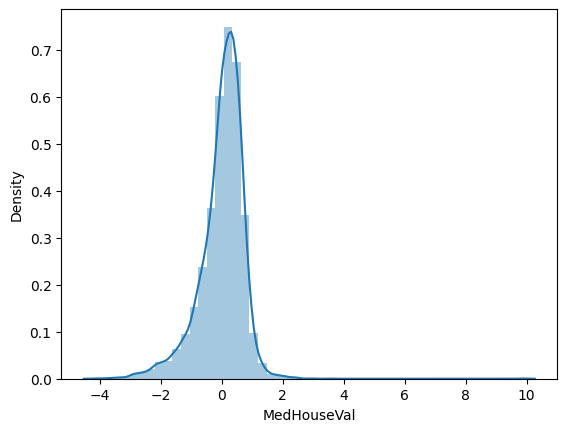

In [ ]:
import seaborn as sns
sns.distplot(reg_predict-y_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score  = r2_score(reg_predict,y_test)

In [ ]:
score

0.3451339380943961

# Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regressor = Ridge()

In [ ]:
ridge_regressor

Ridge()

In [ ]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,100]}
ridgeCV = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgeCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgeCV.best_params_)
print(ridgeCV.best_score_)

{'alpha': 5}
-0.5268179966861514


In [ ]:
ridge_pred = ridgeCV.predict(x_test)

/tmp/ipython-input-3575614972.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ridge_pred-y_test)


<Axes: xlabel='MedHouseVal', ylabel='Density'>

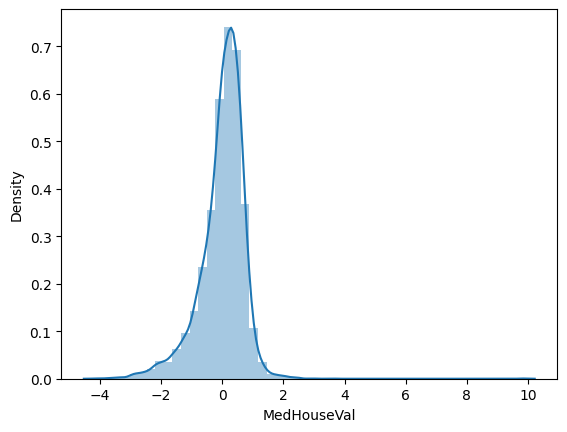

In [ ]:
import seaborn as sns
sns.distplot(ridge_pred-y_test)

In [ ]:
score = r2_score(ridge_pred,y_test)

In [ ]:
print(score)

0.34383945441404484


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()

In [ ]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,100]}
lassoCV = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassoCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassoCV.best_params_)
print(lassoCV.best_score_)

{'alpha': 1}
-1.3400019579636542


In [ ]:
lasso_pred = lassoCV.predict(x_test)

/tmp/ipython-input-4114224753.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distplot(lasso_pred-y_test)


<Axes: xlabel='MedHouseVal', ylabel='Density'>

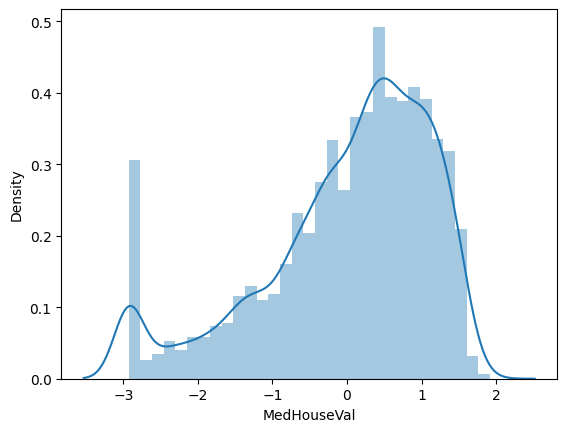

In [ ]:
from seaborn import distplot
distplot(lasso_pred-y_test)